# üìå LSTM Î™®Îç∏ÏùÑ Ïù¥Ïö©Ìïú ÎãàÏºà Í∞ÄÍ≤© ÏòàÏ∏°

### ÏÇ¨Ïö©Î≥ÄÏàò : Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò, Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò, ÏãúÏû•Ï†ÑÎßùÏßÄÌëú, Î¨¥Ïó≠ÏàòÏßÄ, ÌôòÏú®, 2Ï∞®Ï†ÑÏßÄ ÏÇ∞ÏóÖÏßÄÏàò 

In [84]:
#!pip install torchvision

In [85]:
import torch
import torch.nn
import torchvision.transforms as transforms
import torchvision.datasets
from torch.autograd import Variable
from torch.nn import Parameter
import torch.nn as nn
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [86]:
plt.style.use('seaborn-whitegrid')

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

cuda = True if torch.cuda.is_available() else False
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

torch.manual_seed(125)

if torch.cuda.is_available() :
    torch.cuda.manual_seed_all(125)

C:\Users\wandong\AppData\Local\Temp\ipykernel_25956\1616429856.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## 1. Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú ÌôïÏù∏

In [87]:
import pandas as pd
import numpy as np
df=pd.read_csv('../../data/final/ÎãàÏºàdata.csv',encoding='cp949')
Ï£ºÏãù=pd.read_csv('../../data/final/Ï£ºÏãù.csv',encoding='cp949')
df=pd.merge(df,Ï£ºÏãù,left_on='Í∏∞Ï§ÄÏùº',right_on='Date',how='left')
df=df[df['Í∏∞Ï§ÄÏùº']<'2024-05-01']
df

Í∏∞Ï§ÄÏùº   Í∏∞Ï§ÄÍ∞ÄÍ≤©       Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò      Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò           ÌôòÏú®  ÏãúÏû•Ï†ÑÎßùÏßÄÌëú  \
0    2021-06-09  18088  2407.510943  2494.113774  1116.890015   12.57   
1    2021-06-10  17783  2436.458355  2523.494802  1116.410034   12.57   
2    2021-06-11  18303  2452.915918  2519.403176  1111.260010   12.57   
3    2021-06-14  18276  2498.367968  2567.594194  1115.550049   12.57   
4    2021-06-15  17909  2496.551463  2564.669309  1116.319946   12.57   
..          ...    ...          ...          ...          ...     ...   
726  2024-04-24  18985  2886.010511  2500.915660  1370.479980   44.88   
727  2024-04-25  18855  2895.915528  2521.507684  1376.969971   44.88   
728  2024-04-26  19180  2917.287957  2545.055457  1371.699951   44.88   
729  2024-04-29  19115  2909.741785  2543.688728  1377.089966   44.88   
730  2024-04-30  18975  2916.819251  2538.732701  1374.640015   44.88   

        Î¨¥Ïó≠ÏàòÏßÄ  ÏàòÏ∂ú Ï§ëÎüâ  ÏàòÏ∂ú Í∏àÏï°     ÏàòÏûÖ Ï§ëÎüâ  ...     ÏÇºÏÑ±SDI      LGÌôîÌïô    ÏóêÏΩîÌîÑÎ°úÎπÑÏó†  \
0   -26962.0    0.0    0.0  311072.1  ...  0.550586  0.818009  0.000000   
1   -26962.0    0.0    0.0  311072.1  ...  0.559105  0.827488  0.004433   
2   -26962.0    0.0    0.0  311072.1  ...  0.618743  0.909005  0.007149   
3   -26962.0    0.0    0.0  311072.1  ...  0.620873  0.865403  0.007209   
4   -26962.0    0.0    0.0  311072.1  ...  0.650692  0.852133  0.008213   
..       ...    ...    ...       ...  ...       ...       ...       ...   
726 -19126.0  102.3   76.0  247605.0  ...  0.158679  0.020853  0.482357   
727 -19126.0  102.3   76.0  247605.0  ...  0.140575  0.004739  0.454861   
728 -19126.0  102.3   76.0  247605.0  ...  0.129925  0.005687  0.459643   
729 -19126.0  102.3   76.0  247605.0  ...  0.156550  0.047393  0.466816   
730 -19126.0  102.3   76.0  247605.0  ...  0.184239  0.060664  0.465620   

         ÏóêÏΩîÌîÑÎ°ú   skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò      ÏóòÏï§ÏóêÌîÑ    ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨  Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à   ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§      ÌèâÍ∑†Ï£ºÍ∞Ä  
0    0.002092  0.889477  0.000000  0.000000    0.328393  0.285927  0.319387  
1    0.002511  0.863166  0.006937  0.002379    0.322835  0.281459  0.318924  
2    0.000152  0.889477  0.012713  0.006423    0.338583  0.272524  0.339419  
3    0.000455  0.905267  0.023114  0.006900    0.348773  0.285182  0.340353  
4    0.000268  0.963163  0.012300  0.004998    0.354331  0.281459  0.347506  
..        ...       ...       ...       ...         ...       ...       ...  
726  0.380355  0.033163  0.291067  0.610744    0.150533  0.483246  0.290111  
727  0.399120  0.019791  0.267836  0.600151    0.148680  0.484736  0.280054  
728  0.390736  0.015512  0.279051  0.595818    0.129226  0.481757  0.276373  
729  0.390736  0.047605  0.311494  0.619411    0.135248  0.578555  0.305979  
730  0.391534  0.039046  0.306688  0.615559    0.129226  0.584512  0.308565  

[731 rows x 23 columns]

In [88]:
df['ÏàòÍ∏âÏÉÅÌÉú'] = pd.cut(df['ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò'],
                   bins=[-float('inf'), 1, 5, 20, 80, float('inf')],
                   labels=['ÏàòÍ∏âÏúÑÍ∏∞', 'ÏàòÍ∏âÎ∂àÏïà', 'ÏàòÍ∏âÏ£ºÏùò', 'ÏàòÍ∏âÏïàÏ†ï', 'Í≥µÍ∏âÍ≥ºÏûâ'])
df[['ÏàòÍ∏âÏÉÅÌÉú','ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò']]

ÏàòÍ∏âÏÉÅÌÉú  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò
0    ÏàòÍ∏âÏ£ºÏùò    12.08
1    ÏàòÍ∏âÏ£ºÏùò    12.08
2    ÏàòÍ∏âÏ£ºÏùò    12.08
3    ÏàòÍ∏âÏ£ºÏùò    12.08
4    ÏàòÍ∏âÏ£ºÏùò    12.08
..    ...      ...
726  ÏàòÍ∏âÏïàÏ†ï    44.00
727  ÏàòÍ∏âÏïàÏ†ï    44.00
728  ÏàòÍ∏âÏïàÏ†ï    44.00
729  ÏàòÍ∏âÏïàÏ†ï    44.00
730  ÏàòÍ∏âÏïàÏ†ï    44.00

[731 rows x 2 columns]

In [89]:
### 41Í∞úÏùò Í≥µÌú¥ÏùºÍ∞íÎì§Ïù¥ Ï°¥Ïû¨Ìï¥ÏÑú Ïù¥Ï†Ñ Í∞íÏúºÎ°ú Ï±ÑÏõåÏ§å

In [90]:
df.isna().sum()

Í∏∞Ï§ÄÏùº            0
Í∏∞Ï§ÄÍ∞ÄÍ≤©           0
Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò         0
Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò        0
ÌôòÏú®             0
ÏãúÏû•Ï†ÑÎßùÏßÄÌëú         0
Î¨¥Ïó≠ÏàòÏßÄ           0
ÏàòÏ∂ú Ï§ëÎüâ          0
ÏàòÏ∂ú Í∏àÏï°          0
ÏàòÏûÖ Ï§ëÎüâ          0
ÏàòÏûÖ Í∏àÏï°          0
ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò        0
Date          37
ÏÇºÏÑ±SDI         37
LGÌôîÌïô          37
ÏóêÏΩîÌîÑÎ°úÎπÑÏó†        37
ÏóêÏΩîÌîÑÎ°ú          37
skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò       37
ÏóòÏï§ÏóêÌîÑ          37
ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨        37
Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à    37
ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§       37
ÌèâÍ∑†Ï£ºÍ∞Ä          37
ÏàòÍ∏âÏÉÅÌÉú           0
dtype: int64

In [91]:
df[df['ÏÇºÏÑ±SDI'].isna()]

Í∏∞Ï§ÄÏùº   Í∏∞Ï§ÄÍ∞ÄÍ≤©       Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò      Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò           ÌôòÏú®  ÏãúÏû•Ï†ÑÎßùÏßÄÌëú  \
48   2021-08-16  19505  2611.001738  2452.157182  1161.380005    9.43   
72   2021-09-20  19080  2638.483063  2280.239178  1181.109985    9.44   
73   2021-09-21  18910  2572.472455  2184.622732  1186.319946    9.44   
74   2021-09-22  19080  2568.787705  2184.369788  1182.920044    9.44   
82   2021-10-04  18140  2801.897615  2297.897703  1180.000000    9.15   
87   2021-10-11  19420  2860.247889  2371.276826  1195.579956    9.15   
144  2021-12-31  20925  2732.838089  2436.649303  1189.890015   10.56   
164  2022-01-31  22800  3155.461921  2647.558869  1207.709961    9.16   
165  2022-02-01  23300  3136.177572  2633.948478  1205.119995    7.70   
166  2022-02-02  23400  3127.018457  2637.423455  1202.500000    7.70   
185  2022-03-01  25450  3431.758631  2746.583091  1200.930054    6.49   
191  2022-03-09  30800  4095.184037  3033.305065  1233.109985    6.49   
229  2022-05-05  30200  3732.409201  2686.111785  1251.500000    8.44   
248  2022-06-01  27710  3763.592951  2619.178871  1241.739990    7.89   
249  2022-06-06  29400  3725.586595  2588.666301  1250.530029    7.89   
299  2022-08-15  21850  3339.464534  2268.909467  1301.380005   17.08   
317  2022-09-09  22200  3208.595809  2117.568073  1383.000000   17.02   
318  2022-09-12  23325  3244.449745  2152.293238  1379.060059   17.02   
333  2022-10-03  21575  3215.841625  2097.001277  1439.229980   17.30   
338  2022-10-10  22100  3209.233043  2154.807867  1415.979980   17.30   
395  2022-12-30  30425  3447.039556  2377.806854  1260.260010   12.35   
410  2023-01-23  27650  3460.289017  2520.899992  1230.030029    9.91   
411  2023-01-24  28110  3436.840203  2521.419259  1229.280029    9.91   
437  2023-03-01  25025  3141.974323  2380.082784  1321.599976   14.55   
481  2023-05-05  23800  2794.247344  2224.523201  1320.150024   19.28   
501  2023-06-06  21050  2709.524517  2174.694288  1299.790039   26.93   
551  2023-08-15  19685  2718.633648  2137.240043  1334.739990   29.12   
582  2023-09-28  18650  2820.579516  2235.451743  1352.819946   32.21   
583  2023-09-29  18510  2846.235163  2261.634956  1347.849976   32.21   
584  2023-10-02  18510  2854.533125  2295.067520  1351.939941   33.26   
585  2023-10-03  18405  2827.349330  2276.148322  1354.189941   33.26   
589  2023-10-09  18610  2744.363168  2230.745254  1343.359985   33.26   
646  2023-12-29  16300  2783.292533  2374.529395  1277.839966   49.29   
675  2024-02-09  15725  2665.566962  2296.133351  1331.469971   53.19   
676  2024-02-12  15755  2652.595001  2271.377167  1330.060059   53.19   
690  2024-03-01  17175  2675.734502  2269.432525  1335.199951   52.24   
716  2024-04-10  18585  2743.248054  2373.275938  1348.540039   44.88   

        Î¨¥Ïó≠ÏàòÏßÄ  ÏàòÏ∂ú Ï§ëÎüâ  ÏàòÏ∂ú Í∏àÏï°     ÏàòÏûÖ Ï§ëÎüâ  ...  LGÌôîÌïô  ÏóêÏΩîÌîÑÎ°úÎπÑÏó† ÏóêÏΩîÌîÑÎ°ú  skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò  ÏóòÏï§ÏóêÌîÑ  \
48  -38193.0    0.0    0.0  355608.0  ...   NaN     NaN  NaN      NaN   NaN   
72  -39324.0    0.0    0.0  365787.0  ...   NaN     NaN  NaN      NaN   NaN   
73  -39324.0    0.0    0.0  365787.0  ...   NaN     NaN  NaN      NaN   NaN   
74  -39324.0    0.0    0.0  365787.0  ...   NaN     NaN  NaN      NaN   NaN   
82  -27437.0    0.0    0.0  175318.9  ...   NaN     NaN  NaN      NaN   NaN   
87  -27437.0    0.0    0.0  175318.9  ...   NaN     NaN  NaN      NaN   NaN   
144 -42275.0    0.0    0.0  352606.0  ...   NaN     NaN  NaN      NaN   NaN   
164 -21087.0    0.0    0.0  187410.1  ...   NaN     NaN  NaN      NaN   NaN   
165 -13904.0    0.0    0.0  120257.0  ...   NaN     NaN  NaN      NaN   NaN   
166 -13904.0    0.0    0.0  120257.0  ...   NaN     NaN  NaN      NaN   NaN   
185 -13439.0   45.6   64.0  109901.0  ...   NaN     NaN  NaN      NaN   NaN   
191 -13439.0   45.6   64.0  109901.0  ...   NaN     NaN  NaN      NaN   NaN   
229 -52058.0    0.0    0.0  308722.0  ...   NaN     NaN  NaN      NaN   NaN   
2

In [92]:
Ï£ºÏãù.head(3)

Date     ÏÇºÏÑ±SDI      LGÌôîÌïô    ÏóêÏΩîÌîÑÎ°úÎπÑÏó†      ÏóêÏΩîÌîÑÎ°ú   skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò      ÏóòÏï§ÏóêÌîÑ  \
0  2021-06-09  0.550586  0.818009  0.000000  0.002092  0.889477  0.000000   
1  2021-06-10  0.559105  0.827488  0.004433  0.002511  0.863166  0.006937   
2  2021-06-11  0.618743  0.909005  0.007149  0.000152  0.889477  0.012713   

     ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨  Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à   ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§      ÌèâÍ∑†Ï£ºÍ∞Ä  
0  0.000000    0.328393  0.285927  0.319387  
1  0.002379    0.322835  0.281459  0.318924  
2  0.006423    0.338583  0.272524  0.339419

In [93]:
df.ffill(inplace=True)
df

Í∏∞Ï§ÄÏùº   Í∏∞Ï§ÄÍ∞ÄÍ≤©       Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò      Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò           ÌôòÏú®  ÏãúÏû•Ï†ÑÎßùÏßÄÌëú  \
0    2021-06-09  18088  2407.510943  2494.113774  1116.890015   12.57   
1    2021-06-10  17783  2436.458355  2523.494802  1116.410034   12.57   
2    2021-06-11  18303  2452.915918  2519.403176  1111.260010   12.57   
3    2021-06-14  18276  2498.367968  2567.594194  1115.550049   12.57   
4    2021-06-15  17909  2496.551463  2564.669309  1116.319946   12.57   
..          ...    ...          ...          ...          ...     ...   
726  2024-04-24  18985  2886.010511  2500.915660  1370.479980   44.88   
727  2024-04-25  18855  2895.915528  2521.507684  1376.969971   44.88   
728  2024-04-26  19180  2917.287957  2545.055457  1371.699951   44.88   
729  2024-04-29  19115  2909.741785  2543.688728  1377.089966   44.88   
730  2024-04-30  18975  2916.819251  2538.732701  1374.640015   44.88   

        Î¨¥Ïó≠ÏàòÏßÄ  ÏàòÏ∂ú Ï§ëÎüâ  ÏàòÏ∂ú Í∏àÏï°     ÏàòÏûÖ Ï§ëÎüâ  ...      LGÌôîÌïô    ÏóêÏΩîÌîÑÎ°úÎπÑÏó†      ÏóêÏΩîÌîÑÎ°ú  \
0   -26962.0    0.0    0.0  311072.1  ...  0.818009  0.000000  0.002092   
1   -26962.0    0.0    0.0  311072.1  ...  0.827488  0.004433  0.002511   
2   -26962.0    0.0    0.0  311072.1  ...  0.909005  0.007149  0.000152   
3   -26962.0    0.0    0.0  311072.1  ...  0.865403  0.007209  0.000455   
4   -26962.0    0.0    0.0  311072.1  ...  0.852133  0.008213  0.000268   
..       ...    ...    ...       ...  ...       ...       ...       ...   
726 -19126.0  102.3   76.0  247605.0  ...  0.020853  0.482357  0.380355   
727 -19126.0  102.3   76.0  247605.0  ...  0.004739  0.454861  0.399120   
728 -19126.0  102.3   76.0  247605.0  ...  0.005687  0.459643  0.390736   
729 -19126.0  102.3   76.0  247605.0  ...  0.047393  0.466816  0.390736   
730 -19126.0  102.3   76.0  247605.0  ...  0.060664  0.465620  0.391534   

      skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò      ÏóòÏï§ÏóêÌîÑ    ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨  Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à   ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§      ÌèâÍ∑†Ï£ºÍ∞Ä  ÏàòÍ∏âÏÉÅÌÉú  
0    0.889477  0.000000  0.000000    0.328393  0.285927  0.319387  ÏàòÍ∏âÏ£ºÏùò  
1    0.863166  0.006937  0.002379    0.322835  0.281459  0.318924  ÏàòÍ∏âÏ£ºÏùò  
2    0.889477  0.012713  0.006423    0.338583  0.272524  0.339419  ÏàòÍ∏âÏ£ºÏùò  
3    0.905267  0.023114  0.006900    0.348773  0.285182  0.340353  ÏàòÍ∏âÏ£ºÏùò  
4    0.963163  0.012300  0.004998    0.354331  0.281459  0.347506  ÏàòÍ∏âÏ£ºÏùò  
..        ...       ...       ...         ...       ...       ...   ...  
726  0.033163  0.291067  0.610744    0.150533  0.483246  0.290111  ÏàòÍ∏âÏïàÏ†ï  
727  0.019791  0.267836  0.600151    0.148680  0.484736  0.280054  ÏàòÍ∏âÏïàÏ†ï  
728  0.015512  0.279051  0.595818    0.129226  0.481757  0.276373  ÏàòÍ∏âÏïàÏ†ï  
729  0.047605  0.311494  0.619411    0.135248  0.578555  0.305979  ÏàòÍ∏âÏïàÏ†ï  
730  0.039046  0.306688  0.615559    0.129226  0.584512  0.308565  ÏàòÍ∏âÏïàÏ†ï  

[731 rows x 24 columns]

In [94]:
df.isna().sum()

Í∏∞Ï§ÄÏùº           0
Í∏∞Ï§ÄÍ∞ÄÍ≤©          0
Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò        0
Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò       0
ÌôòÏú®            0
ÏãúÏû•Ï†ÑÎßùÏßÄÌëú        0
Î¨¥Ïó≠ÏàòÏßÄ          0
ÏàòÏ∂ú Ï§ëÎüâ         0
ÏàòÏ∂ú Í∏àÏï°         0
ÏàòÏûÖ Ï§ëÎüâ         0
ÏàòÏûÖ Í∏àÏï°         0
ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò       0
Date          0
ÏÇºÏÑ±SDI         0
LGÌôîÌïô          0
ÏóêÏΩîÌîÑÎ°úÎπÑÏó†        0
ÏóêÏΩîÌîÑÎ°ú          0
skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò       0
ÏóòÏï§ÏóêÌîÑ          0
ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨        0
Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à    0
ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§       0
ÌèâÍ∑†Ï£ºÍ∞Ä          0
ÏàòÍ∏âÏÉÅÌÉú          0
dtype: int64

In [95]:
df.rename(columns={'Í∏∞Ï§ÄÏùº':'DATE'},inplace=True)
data=df['DATE']
df.set_index('DATE',inplace=True)
# df.drop('Unnamed: 0',axis=1,inplace=True)
df

Í∏∞Ï§ÄÍ∞ÄÍ≤©       Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò      Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò           ÌôòÏú®  ÏãúÏû•Ï†ÑÎßùÏßÄÌëú     Î¨¥Ïó≠ÏàòÏßÄ  \
DATE                                                                        
2021-06-09  18088  2407.510943  2494.113774  1116.890015   12.57 -26962.0   
2021-06-10  17783  2436.458355  2523.494802  1116.410034   12.57 -26962.0   
2021-06-11  18303  2452.915918  2519.403176  1111.260010   12.57 -26962.0   
2021-06-14  18276  2498.367968  2567.594194  1115.550049   12.57 -26962.0   
2021-06-15  17909  2496.551463  2564.669309  1116.319946   12.57 -26962.0   
...           ...          ...          ...          ...     ...      ...   
2024-04-24  18985  2886.010511  2500.915660  1370.479980   44.88 -19126.0   
2024-04-25  18855  2895.915528  2521.507684  1376.969971   44.88 -19126.0   
2024-04-26  19180  2917.287957  2545.055457  1371.699951   44.88 -19126.0   
2024-04-29  19115  2909.741785  2543.688728  1377.089966   44.88 -19126.0   
2024-04-30  18975  2916.819251  2538.732701  1374.640015   44.88 -19126.0   

            ÏàòÏ∂ú Ï§ëÎüâ  ÏàòÏ∂ú Í∏àÏï°     ÏàòÏûÖ Ï§ëÎüâ    ÏàòÏûÖ Í∏àÏï°  ...      LGÌôîÌïô    ÏóêÏΩîÌîÑÎ°úÎπÑÏó†  \
DATE                                         ...                       
2021-06-09    0.0    0.0  311072.1  26962.0  ...  0.818009  0.000000   
2021-06-10    0.0    0.0  311072.1  26962.0  ...  0.827488  0.004433   
2021-06-11    0.0    0.0  311072.1  26962.0  ...  0.909005  0.007149   
2021-06-14    0.0    0.0  311072.1  26962.0  ...  0.865403  0.007209   
2021-06-15    0.0    0.0  311072.1  26962.0  ...  0.852133  0.008213   
...           ...    ...       ...      ...  ...       ...       ...   
2024-04-24  102.3   76.0  247605.0  19202.0  ...  0.020853  0.482357   
2024-04-25  102.3   76.0  247605.0  19202.0  ...  0.004739  0.454861   
2024-04-26  102.3   76.0  247605.0  19202.0  ...  0.005687  0.459643   
2024-04-29  102.3   76.0  247605.0  19202.0  ...  0.047393  0.466816   
2024-04-30  102.3   76.0  247605.0  19202.0  ...  0.060664  0.465620   

                ÏóêÏΩîÌîÑÎ°ú   skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò      ÏóòÏï§ÏóêÌîÑ    ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨  Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à   ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§  \
DATE                                                                       
2021-06-09  0.002092  0.889477  0.000000  0.000000    0.328393  0.285927   
2021-06-10  0.002511  0.863166  0.006937  0.002379    0.322835  0.281459   
2021-06-11  0.000152  0.889477  0.012713  0.006423    0.338583  0.272524   
2021-06-14  0.000455  0.905267  0.023114  0.006900    0.348773  0.285182   
2021-06-15  0.000268  0.963163  0.012300  0.004998    0.354331  0.281459   
...              ...       ...       ...       ...         ...       ...   
2024-04-24  0.380355  0.033163  0.291067  0.610744    0.150533  0.483246   
2024-04-25  0.399120  0.019791  0.267836  0.600151    0.148680  0.484736   
2024-04-26  0.390736  0.015512  0.279051  0.595818    0.129226  0.481757   
2024-04-29  0.390736  0.047605  0.311494  0.619411    0.135248  0.578555   
2024-04-30  0.391534  0.039046  0.306688  0.615559    0.129226  0.584512   

                ÌèâÍ∑†Ï£ºÍ∞Ä  ÏàòÍ∏âÏÉÅÌÉú  
DATE                        
2021-06-09  0.319387  ÏàòÍ∏âÏ£ºÏùò  
2021-06-10  0.318924  ÏàòÍ∏âÏ£ºÏùò  
2021-06-11  0.339419  ÏàòÍ∏âÏ£ºÏùò  
2021-06-14  0.340353  ÏàòÍ∏âÏ£ºÏùò  
2021-06-15  0.347506  ÏàòÍ∏âÏ£ºÏùò  
...              ...   ...  
2024-04-24  0.290111  ÏàòÍ∏âÏïàÏ†ï  
2024-04-25  0.280054  ÏàòÍ∏âÏïàÏ†ï  
2024-04-26  0.276373  ÏàòÍ∏âÏïàÏ†ï  
2024-04-29  0.305979  ÏàòÍ∏âÏïàÏ†ï  
2024-04-30  0.308565  ÏàòÍ∏âÏïàÏ†ï  

[731 rows x 23 columns]

In [96]:
df.isna().sum()

Í∏∞Ï§ÄÍ∞ÄÍ≤©          0
Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò        0
Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò       0
ÌôòÏú®            0
ÏãúÏû•Ï†ÑÎßùÏßÄÌëú        0
Î¨¥Ïó≠ÏàòÏßÄ          0
ÏàòÏ∂ú Ï§ëÎüâ         0
ÏàòÏ∂ú Í∏àÏï°         0
ÏàòÏûÖ Ï§ëÎüâ         0
ÏàòÏûÖ Í∏àÏï°         0
ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò       0
Date          0
ÏÇºÏÑ±SDI         0
LGÌôîÌïô          0
ÏóêÏΩîÌîÑÎ°úÎπÑÏó†        0
ÏóêÏΩîÌîÑÎ°ú          0
skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò       0
ÏóòÏï§ÏóêÌîÑ          0
ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨        0
Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à    0
ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§       0
ÌèâÍ∑†Ï£ºÍ∞Ä          0
ÏàòÍ∏âÏÉÅÌÉú          0
dtype: int64

In [97]:
drop_columns=['Í∏∞Ï§ÄÍ∞ÄÍ≤©','ÏàòÏ∂ú Ï§ëÎüâ','ÏàòÏ∂ú Í∏àÏï°','ÏàòÏûÖ Ï§ëÎüâ','ÏàòÏûÖ Í∏àÏï°',
             'ÏÇºÏÑ±SDI','LGÌôîÌïô','ÏóêÏΩîÌîÑÎ°úÎπÑÏó†','ÏóêÏΩîÌîÑÎ°ú','skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò','ÏóòÏï§ÏóêÌîÑ','ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨',
             'Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à','ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§','Date','ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò','ÏàòÍ∏âÏÉÅÌÉú']

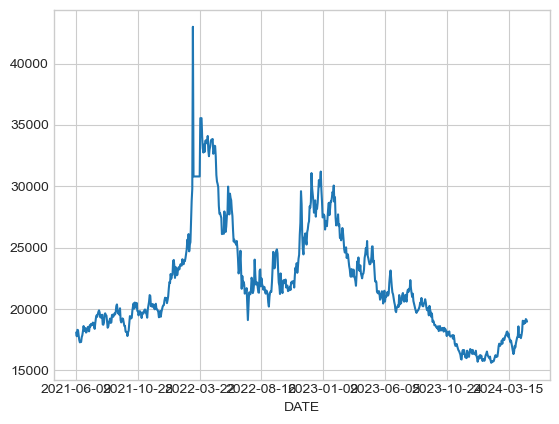

In [98]:
fig = df['Í∏∞Ï§ÄÍ∞ÄÍ≤©'].plot()

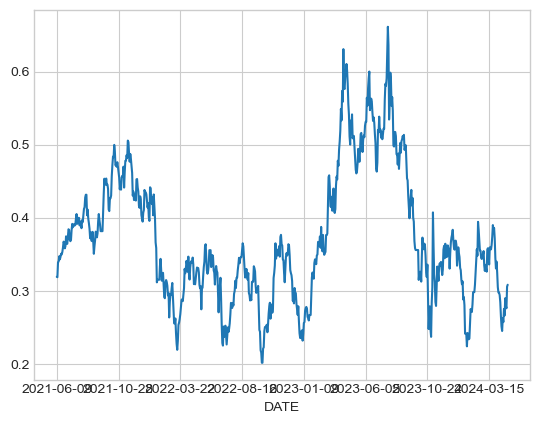

In [99]:
fig = df['ÌèâÍ∑†Ï£ºÍ∞Ä'].plot()

In [100]:
X = df.drop(drop_columns, axis=1) # X, y Î∂ÑÎ¶¨
y = df[['Í∏∞Ï§ÄÍ∞ÄÍ≤©']]

In [101]:
y

Í∏∞Ï§ÄÍ∞ÄÍ≤©
DATE             
2021-06-09  18088
2021-06-10  17783
2021-06-11  18303
2021-06-14  18276
2021-06-15  17909
...           ...
2024-04-24  18985
2024-04-25  18855
2024-04-26  19180
2024-04-29  19115
2024-04-30  18975

[731 rows x 1 columns]

In [102]:
X.fillna(0,inplace=True)
X.isna().sum()
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 2021-06-09 to 2024-04-30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò   731 non-null    float64
 1   Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò  731 non-null    float64
 2   ÌôòÏú®       731 non-null    float64
 3   ÏãúÏû•Ï†ÑÎßùÏßÄÌëú   731 non-null    float64
 4   Î¨¥Ïó≠ÏàòÏßÄ     731 non-null    float64
 5   ÌèâÍ∑†Ï£ºÍ∞Ä     731 non-null    float64
dtypes: float64(6)
memory usage: 40.0+ KB


In [103]:
X

Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò      Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò           ÌôòÏú®  ÏãúÏû•Ï†ÑÎßùÏßÄÌëú     Î¨¥Ïó≠ÏàòÏßÄ      ÌèâÍ∑†Ï£ºÍ∞Ä
DATE                                                                        
2021-06-09  2407.510943  2494.113774  1116.890015   12.57 -26962.0  0.319387
2021-06-10  2436.458355  2523.494802  1116.410034   12.57 -26962.0  0.318924
2021-06-11  2452.915918  2519.403176  1111.260010   12.57 -26962.0  0.339419
2021-06-14  2498.367968  2567.594194  1115.550049   12.57 -26962.0  0.340353
2021-06-15  2496.551463  2564.669309  1116.319946   12.57 -26962.0  0.347506
...                 ...          ...          ...     ...      ...       ...
2024-04-24  2886.010511  2500.915660  1370.479980   44.88 -19126.0  0.290111
2024-04-25  2895.915528  2521.507684  1376.969971   44.88 -19126.0  0.280054
2024-04-26  2917.287957  2545.055457  1371.699951   44.88 -19126.0  0.276373
2024-04-29  2909.741785  2543.688728  1377.089966   44.88 -19126.0  0.305979
2024-04-30  2916.819251  2538.732701  1374.640015   44.88 -19126.0  0.308565

[731 rows x 6 columns]

## 2. 8:2 Î°ú train test Î∂ÑÎ¶¨

In [104]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ms = MinMaxScaler() # 0 ~ 1
ss = StandardScaler() # ÌèâÍ∑† 0, Î∂ÑÏÇ∞ 1

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y)

X_train = X_ss[:725, :] 
X_test = X_ss[725:, :]

y_train = y_ms[:725, :]
y_test = y_ms[725:, :]

print('Training Shape :', X_train.shape, y_train.shape)
print('Testing Shape :', X_test.shape, y_test.shape)

Training Shape : (725, 6) (725, 1)
Testing Shape : (6, 6) (6, 1)


In [105]:
# Îç∞Ïù¥ÌÑ∞ÏÖã ÌòïÌÉú Î∞è ÌÅ¨Í∏∞ Ï°∞Ï†ï
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors, 
                                  (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))

X_test_tensors_f = torch.reshape(X_test_tensors,
                                (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

print('Training Shape :', X_train.shape, y_train.shape)
print('Testing Shape :', X_test.shape, y_test.shape)

Training Shape : (725, 6) (725, 1)
Testing Shape : (6, 6) (6, 1)


## 3. LSTM Î™®Îç∏ ÏÑ§Ï†ï

In [106]:
import torch
import torch.nn as nn
from torch.autograd import Variable

class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length, dropout_prob=0.0):
        super(LSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        self.fc_1 = nn.Linear(hidden_size, 128)
        self.dropout = nn.Dropout(p=dropout_prob)  # Dropout layer added
        self.fc = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        
        output, (hn, cn) = self.lstm(x, (h_0, c_0))
        hn = hn.view(-1, self.hidden_size)
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.dropout(out)  # Applying dropout before the final fully connected layer
        out = self.fc(out)
        return out


In [107]:
num_epochs = 2500
learning_rate = 0.009

input_size=6 # ÏπºÎüº Í∞úÏàò
hidden_size=45 # ÏùÄÎãâÏ∏µ Ïú†Îãõ Í∞úÏàò
num_layers=1 # LSTM Í≥ÑÏ∏µ Í∞úÏàò
dropout_prob = 0.3

num_classes=1 # ÌÅ¥ÎûòÏä§ Í∞úÏàò
model = LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [108]:
for epoch in range(num_epochs) :
    outputs = model.forward(X_train_tensors_f) # Ï†ÑÎ∞©Ìñ• ÌïôÏäµ
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensors) # Ïò§Ï∞® Í≥ÑÏÇ∞
    loss.backward() # Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞
    
    optimizer.step() # Ïò§Ï∞® ÏóÖÎç∞Ïù¥Ìä∏
    if epoch % 100 == 0 :
        print(f'Epoch : {epoch}, loss : {loss.item():1.5f}')

Epoch : 0, loss : 0.09000
Epoch : 100, loss : 0.00168
Epoch : 200, loss : 0.00089
Epoch : 300, loss : 0.00061
Epoch : 400, loss : 0.00065
Epoch : 500, loss : 0.00047
Epoch : 600, loss : 0.00044
Epoch : 700, loss : 0.00039
Epoch : 800, loss : 0.00035
Epoch : 900, loss : 0.00053
Epoch : 1000, loss : 0.00031
Epoch : 1100, loss : 0.00030
Epoch : 1200, loss : 0.00034
Epoch : 1300, loss : 0.00031
Epoch : 1400, loss : 0.00025
Epoch : 1500, loss : 0.00023
Epoch : 1600, loss : 0.00022
Epoch : 1700, loss : 0.00027
Epoch : 1800, loss : 0.00021
Epoch : 1900, loss : 0.00022
Epoch : 2000, loss : 0.00026
Epoch : 2100, loss : 0.00021
Epoch : 2200, loss : 0.00028
Epoch : 2300, loss : 0.00027
Epoch : 2400, loss : 0.00020


In [109]:
df_x_ss = ss.transform(X)
df_y_ms = ms.transform(y)

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

## 4. ÏòàÏ∏°Îêú Ï£ºÏãù Í∞íÍ≥º Ïã§Ï†ú Ï£ºÏãù Í∞íÏùÑ ÏãúÍ∞ÅÌôî

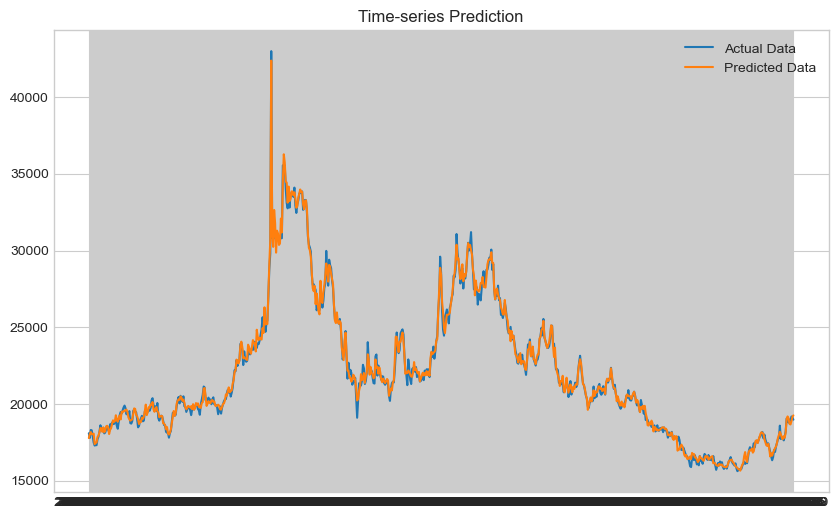

In [110]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy()

label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted)
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10, 6))
# plt.axvline(x=datetime(2022,5,1), c='r', linestyle='--')

df['pred'] = predicted
plt.plot(df['Í∏∞Ï§ÄÍ∞ÄÍ≤©'], label='Actual Data')
plt.plot(df['pred'], label='Predicted Data')

plt.title('Time-series Prediction')
plt.legend()
plt.show()

## 5. RMSE Í≥ÑÏÇ∞

In [111]:
from sklearn.metrics import mean_squared_error
import numpy as np

# ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞íÏùÑ NumPy Î∞∞Ïó¥Î°ú Î≥ÄÌôò
predicted = np.array(df['pred'])
actual = np.array(df['Í∏∞Ï§ÄÍ∞ÄÍ≤©'])

# RMSE Í≥ÑÏÇ∞
rmse = np.sqrt(mean_squared_error(actual, predicted))
print(f'RMSE: {rmse}')


RMSE: 327.2846290020201


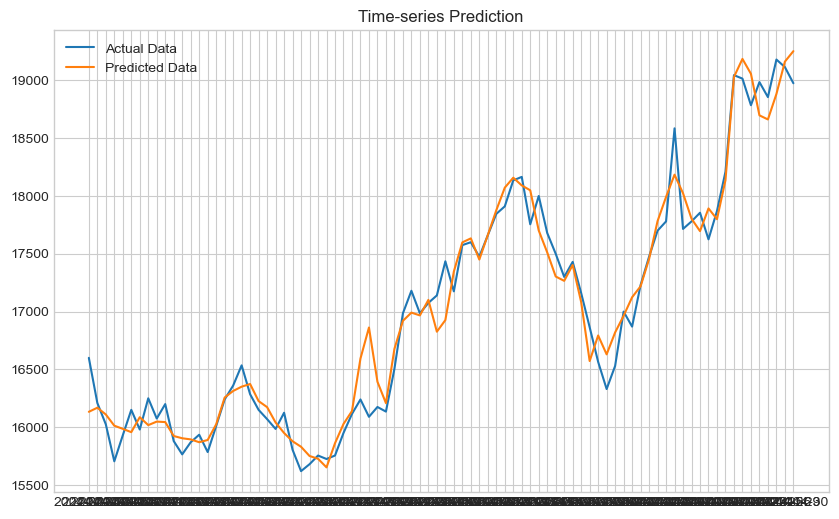

In [112]:
new_df=df.loc['2024-01-01':'2024-04-30']

new_df

plt.figure(figsize=(10, 6))

plt.plot(new_df['Í∏∞Ï§ÄÍ∞ÄÍ≤©'], label='Actual Data')
plt.plot(new_df['pred'], label='Predicted Data')

plt.title('Time-series Prediction')
plt.legend()
plt.show()

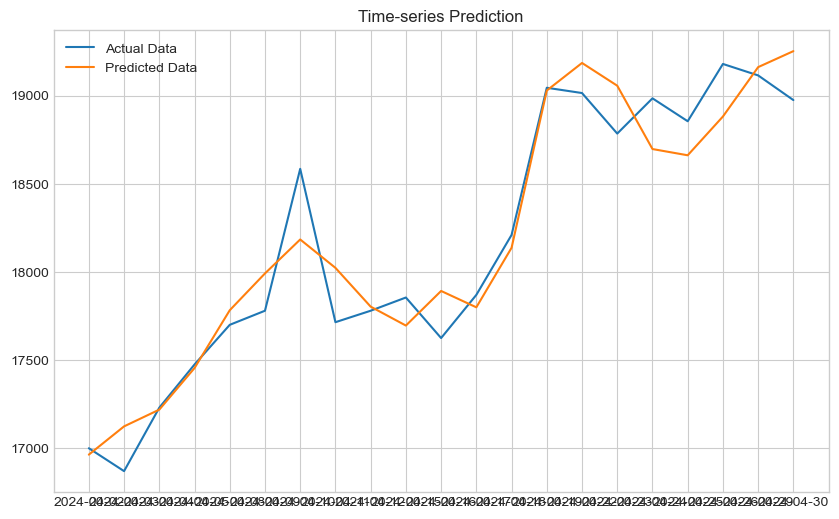

In [113]:
new_df=df.loc['2024-04-01':'2024-04-30']

new_df

plt.figure(figsize=(10, 6))

plt.plot(new_df['Í∏∞Ï§ÄÍ∞ÄÍ≤©'], label='Actual Data')
plt.plot(new_df['pred'], label='Predicted Data')

plt.title('Time-series Prediction')
plt.legend()
plt.show()

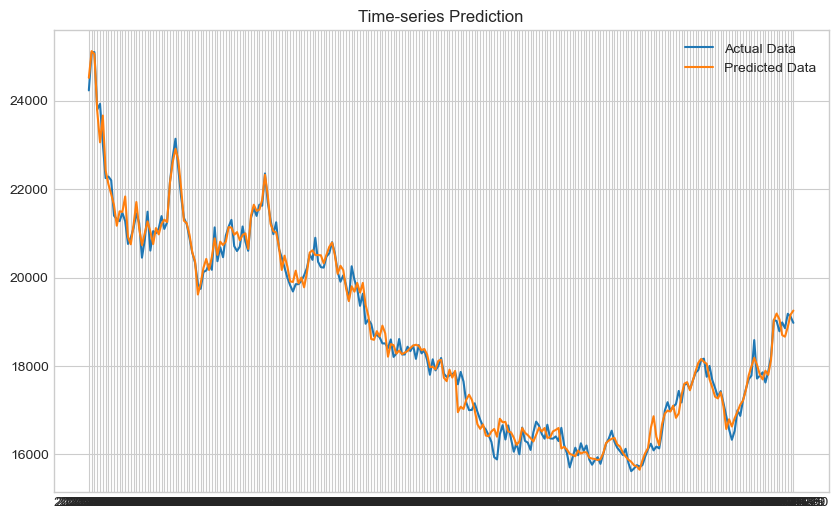

In [114]:
new_df=df.loc['2023-04-30':'2024-04-30']

new_df

plt.figure(figsize=(10, 6))

plt.plot(new_df['Í∏∞Ï§ÄÍ∞ÄÍ≤©'], label='Actual Data')
plt.plot(new_df['pred'], label='Predicted Data')

plt.title('Time-series Prediction')
plt.legend()
plt.show()

## 6. Îç∞Ïù¥ÌÑ∞ ÎÇ¥Î≥¥ÎÇ¥Í∏∞

In [115]:
df

Í∏∞Ï§ÄÍ∞ÄÍ≤©       Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò      Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò           ÌôòÏú®  ÏãúÏû•Ï†ÑÎßùÏßÄÌëú     Î¨¥Ïó≠ÏàòÏßÄ  \
DATE                                                                        
2021-06-09  18088  2407.510943  2494.113774  1116.890015   12.57 -26962.0   
2021-06-10  17783  2436.458355  2523.494802  1116.410034   12.57 -26962.0   
2021-06-11  18303  2452.915918  2519.403176  1111.260010   12.57 -26962.0   
2021-06-14  18276  2498.367968  2567.594194  1115.550049   12.57 -26962.0   
2021-06-15  17909  2496.551463  2564.669309  1116.319946   12.57 -26962.0   
...           ...          ...          ...          ...     ...      ...   
2024-04-24  18985  2886.010511  2500.915660  1370.479980   44.88 -19126.0   
2024-04-25  18855  2895.915528  2521.507684  1376.969971   44.88 -19126.0   
2024-04-26  19180  2917.287957  2545.055457  1371.699951   44.88 -19126.0   
2024-04-29  19115  2909.741785  2543.688728  1377.089966   44.88 -19126.0   
2024-04-30  18975  2916.819251  2538.732701  1374.640015   44.88 -19126.0   

            ÏàòÏ∂ú Ï§ëÎüâ  ÏàòÏ∂ú Í∏àÏï°     ÏàòÏûÖ Ï§ëÎüâ    ÏàòÏûÖ Í∏àÏï°  ...    ÏóêÏΩîÌîÑÎ°úÎπÑÏó†      ÏóêÏΩîÌîÑÎ°ú  \
DATE                                         ...                       
2021-06-09    0.0    0.0  311072.1  26962.0  ...  0.000000  0.002092   
2021-06-10    0.0    0.0  311072.1  26962.0  ...  0.004433  0.002511   
2021-06-11    0.0    0.0  311072.1  26962.0  ...  0.007149  0.000152   
2021-06-14    0.0    0.0  311072.1  26962.0  ...  0.007209  0.000455   
2021-06-15    0.0    0.0  311072.1  26962.0  ...  0.008213  0.000268   
...           ...    ...       ...      ...  ...       ...       ...   
2024-04-24  102.3   76.0  247605.0  19202.0  ...  0.482357  0.380355   
2024-04-25  102.3   76.0  247605.0  19202.0  ...  0.454861  0.399120   
2024-04-26  102.3   76.0  247605.0  19202.0  ...  0.459643  0.390736   
2024-04-29  102.3   76.0  247605.0  19202.0  ...  0.466816  0.390736   
2024-04-30  102.3   76.0  247605.0  19202.0  ...  0.465620  0.391534   

             skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò      ÏóòÏï§ÏóêÌîÑ    ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨  Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à   ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§      ÌèâÍ∑†Ï£ºÍ∞Ä  \
DATE                                                                       
2021-06-09  0.889477  0.000000  0.000000    0.328393  0.285927  0.319387   
2021-06-10  0.863166  0.006937  0.002379    0.322835  0.281459  0.318924   
2021-06-11  0.889477  0.012713  0.006423    0.338583  0.272524  0.339419   
2021-06-14  0.905267  0.023114  0.006900    0.348773  0.285182  0.340353   
2021-06-15  0.963163  0.012300  0.004998    0.354331  0.281459  0.347506   
...              ...       ...       ...         ...       ...       ...   
2024-04-24  0.033163  0.291067  0.610744    0.150533  0.483246  0.290111   
2024-04-25  0.019791  0.267836  0.600151    0.148680  0.484736  0.280054   
2024-04-26  0.015512  0.279051  0.595818    0.129226  0.481757  0.276373   
2024-04-29  0.047605  0.311494  0.619411    0.135248  0.578555  0.305979   
2024-04-30  0.039046  0.306688  0.615559    0.129226  0.584512  0.308565   

            ÏàòÍ∏âÏÉÅÌÉú          pred  
DATE                            
2021-06-09  ÏàòÍ∏âÏ£ºÏùò  17774.183594  
2021-06-10  ÏàòÍ∏âÏ£ºÏùò  18033.552734  
2021-06-11  ÏàòÍ∏âÏ£ºÏùò  18164.876953  
2021-06-14  ÏàòÍ∏âÏ£ºÏùò  18030.750000  
2021-06-15  ÏàòÍ∏âÏ£ºÏùò  18025.503906  
...          ...           ...  
2024-04-24  ÏàòÍ∏âÏïàÏ†ï  18697.287109  
2024-04-25  ÏàòÍ∏âÏïàÏ†ï  18661.890625  
2024-04-26  ÏàòÍ∏âÏïàÏ†ï  18881.882812  
2024-04-29  ÏàòÍ∏âÏïàÏ†ï  19162.046875  
2024-04-30  ÏàòÍ∏âÏïàÏ†ï  19252.716797  

[731 rows x 24 columns]

In [116]:
df.to_csv('../../results/ÎãàÏºàlstm.csv',encoding='cp949')